In [1]:
import pandas as pd
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pymatgen.ext.matproj import MPRester

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
from Encoding import CompoundEncode
from Encoding import DataFrametoDict

API = #Your API here
mpr = MPRester(API)

RelevantElementData = pd.read_csv("BandGapRelevantData.csv")
Dict = DataFrametoDict(RelevantElementData)


Data = mpr.materials.summary.search(fields=["formula_pretty", "band_gap"], band_gap=(0, 10))
Pretty_Formula = []
Band_Gap = []
for i in range(len(Data)):
    if "(" not in Data[i].formula_pretty:
        Pretty_Formula.append(Data[i].formula_pretty)
        Band_Gap.append(Data[i].band_gap)

EncodedData = []

for i in range(len(Pretty_Formula)):
    EncodedData.append(CompoundEncode(Pretty_Formula[i], Dict))

MaterialsDf = pd.DataFrame({"PrettyFormula" : Pretty_Formula, "Data" : EncodedData, "BandGap" : Band_Gap})

MaterialsDf = MaterialsDf.sample(frac=1) #Randomizes DataFrame

Retrieving SummaryDoc documents:   0%|          | 0/153222 [00:00<?, ?it/s]

In [3]:
List_BG = MaterialsDf["BandGap"]
List_Data = MaterialsDf["Data"]

print(List_Data.head(), List_BG.head())

109463    [15.320754716981131, 12.855345911949685, 0.402...
84179     [11.428571428571429, 14.285714285714285, 0.071...
438             [20.2, 13.7, 0.3, 0.65, 0.05, 2.9585, 4.45]
89832     [20.857142857142854, 15.714285714285714, 0.142...
76745     [6.666666666666666, 6.0, 0.3333333333333333, 0...
Name: Data, dtype: object 109463    0.0376
84179     7.7517
438       0.0000
89832     1.4803
76745     3.0051
Name: BandGap, dtype: float64


In [4]:
T_BG = torch.Tensor(List_BG.astype(np.float32))
T_Data = torch.tensor(List_Data.tolist(), dtype=torch.float32)
TrainingSplit = int(0.8*len(T_BG))
n_samples, n_features = T_Data.shape

T_BG_Training = T_BG[:TrainingSplit]
T_Dat_Training = T_Data[:TrainingSplit]

T_BG_Testing = T_BG[TrainingSplit:]
T_Dat_Testing = T_Data[TrainingSplit:]
print(n_samples, n_features)

116816 7


In [5]:
print(T_BG_Training)

tensor([0.0376, 7.7517, 0.0000,  ..., 0.0000, 0.0000, 0.0000])


In [6]:
# class NeuralNetwork(torch.nn.Module):
#     def __init__(self):
#         super().__init__():


#model = torch.nn.Linear(n_features, 1)

model = torch.nn.Sequential(
    torch.nn.Linear(n_features, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1)

)



In [7]:
#Loss Function and Optimizer

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
n_epochs = 1000
list_loss_training = []
list_epoch = []
list_loss_testing = []

def train(model, loss_fn, optimizer):
    model.train()
    optimizer.zero_grad()
    BG_predicted = model(T_Dat_Training)
    loss = loss_fn(BG_predicted.squeeze(), T_BG_Training)
    loss.backward()
    optimizer.step()
    list_loss_training.append(loss.item())
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

def test(model, loss_fn, optimizer):
    model.eval()
    with torch.no_grad():
        loss_testing = loss_fn(model(T_Dat_Testing).squeeze(), T_BG_Testing)
        list_loss_testing.append(loss_testing)
        print(f'loss_testing: {loss_testing.item():.4f}')


for epoch in range(n_epochs):
    train(model, loss_fn, optimizer)
    test(model, loss_fn, optimizer)
    list_epoch.append(epoch+1)

# for epoch in range(n_epochs):
#     BG_predicted = model(T_Dat_Training)
#     loss = loss_fn(BG_predicted.squeeze(), T_BG_Training)
#     with torch.no_grad():
#         loss_testing = loss_fn(model(T_Dat_Testing).squeeze(), T_BG_Testing)
#         list_loss_testing.append(loss_testing)
#     loss.backward()

#     optimizer.step()

#     optimizer.zero_grad()
#     list_loss_training.append(loss.item())
#     list_epoch.append(epoch+1)




#     if (epoch+1) % 10 == 0:
#         print(f'epoch: {epoch+1}, loss: {loss.item():.4f} loss_testing: {loss_testing.item():.4f}')

epoch: 1, loss: 4.0839
loss_testing: 3.0771
epoch: 2, loss: 3.0185
loss_testing: 2.8179
epoch: 3, loss: 2.7636
loss_testing: 2.7959
epoch: 4, loss: 2.7442
loss_testing: 2.6720
epoch: 5, loss: 2.6196
loss_testing: 2.4307
epoch: 6, loss: 2.3755
loss_testing: 2.1866
epoch: 7, loss: 2.1282
loss_testing: 2.0160
epoch: 8, loss: 1.9551
loss_testing: 1.9326
epoch: 9, loss: 1.8703
loss_testing: 1.9126
epoch: 10, loss: 1.8499
loss_testing: 1.9135
epoch: 11, loss: 1.8509
loss_testing: 1.9048
epoch: 12, loss: 1.8422
loss_testing: 1.8851
epoch: 13, loss: 1.8225
loss_testing: 1.8734
epoch: 14, loss: 1.8107
loss_testing: 1.8842
epoch: 15, loss: 1.8214
loss_testing: 1.9096
epoch: 16, loss: 1.8468
loss_testing: 1.9259
epoch: 17, loss: 1.8631
loss_testing: 1.9227
epoch: 18, loss: 1.8599
loss_testing: 1.9090
epoch: 19, loss: 1.8463
loss_testing: 1.8986
epoch: 20, loss: 1.8360
loss_testing: 1.8958
epoch: 21, loss: 1.8336
loss_testing: 1.8948
epoch: 22, loss: 1.8328
loss_testing: 1.8878
epoch: 23, loss: 1.

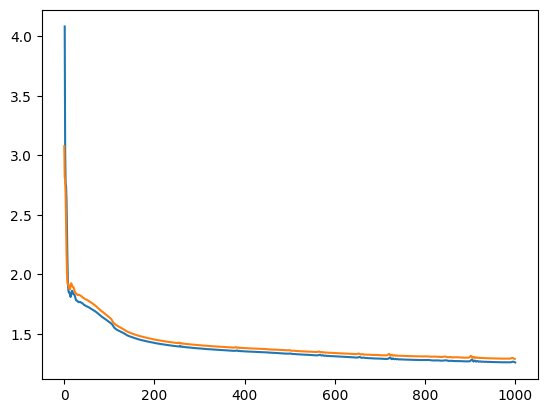

In [9]:
import matplotlib.pyplot as plt

plt.plot(list_epoch, list_loss_training, list_loss_testing)

# print(list_loss_training)

In [10]:
model.eval()
test_loss_list = []

with torch.no_grad():
    predictions = model(T_Dat_Testing)
    for i in range(len(predictions)):
        print(predictions[i], T_BG_Testing[i])


tensor([0.3768]) tensor(0.)
tensor([0.2585]) tensor(0.7191)
tensor([0.0156]) tensor(0.)
tensor([0.0521]) tensor(0.)
tensor([0.4962]) tensor(0.)
tensor([-0.0871]) tensor(0.)
tensor([0.6363]) tensor(0.1887)
tensor([1.7163]) tensor(0.)
tensor([2.3134]) tensor(1.1614)
tensor([0.3563]) tensor(0.)
tensor([0.0128]) tensor(0.)
tensor([-0.0435]) tensor(0.)
tensor([0.8877]) tensor(0.8549)
tensor([1.1167]) tensor(0.)
tensor([0.3682]) tensor(0.)
tensor([2.1673]) tensor(0.)
tensor([2.0304]) tensor(0.)
tensor([1.1352]) tensor(0.9928)
tensor([0.9659]) tensor(0.)
tensor([0.8732]) tensor(0.)
tensor([1.3797]) tensor(0.)
tensor([1.1923]) tensor(0.)
tensor([1.4811]) tensor(0.9491)
tensor([0.2966]) tensor(1.2004)
tensor([0.6044]) tensor(0.8896)
tensor([0.6862]) tensor(1.6308)
tensor([0.0216]) tensor(0.)
tensor([0.6740]) tensor(0.)
tensor([0.0430]) tensor(0.)
tensor([0.0110]) tensor(0.)
tensor([1.9779]) tensor(0.0305)
tensor([1.1682]) tensor(0.)
tensor([0.7526]) tensor(0.)
tensor([0.0195]) tensor(0.)
tensor

In [11]:
# #Saving a Model
# from pathlib import Path

# Model_Path = Path("models")
# Model_Path.mkdir(parents=True, exist_ok=True)

# Model_Name = "BandGap_RegressionModel1.pth"
# Model_Save_Path = Model_Path / Model_Name

# torch.save(model.state_dict(), Model_Save_Path)